In [144]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
# 그래프가 안 그려질 때
%matplotlib inline

In [145]:
'''
PassengerId : 각 승객의 고유번호, 
Survived : 생존여부 (0 = 사망, 1 = 생존)
Pclass : 객실 등급 - 승객의 경제적, 사회적 지위 (1 = 상, 2 = 중, 3 = 하),
Name : 이름
Sex : 성별 (male, female)
Age : 00.0
SibSp : 동반한 형제자매와 배우자의 수
Parch : 동반한 부모, 자식의 수
Ticket : 티켓의 고유번호
Fare : 티켓의 요금
Cabin : 객실 번호
Embarked : 승선한 항 (C = Cherbourg, Q = Queenstown, S = Southampton)
'''

'\nPassengerId : 각 승객의 고유번호, \nSurvived : 생존여부 (0 = 사망, 1 = 생존)\nPclass : 객실 등급 - 승객의 경제적, 사회적 지위 (1 = 상, 2 = 중, 3 = 하),\nName : 이름\nSex : 성별 (male, female)\nAge : 00.0\nSibSp : 동반한 형제자매와 배우자의 수\nParch : 동반한 부모, 자식의 수\nTicket : 티켓의 고유번호\nFare : 티켓의 요금\nCabin : 객실 번호\nEmbarked : 승선한 항 (C = Cherbourg, Q = Queenstown, S = Southampton)\n'

In [146]:
DATA_PATH = '/Users/kij/projects/Competition/kaggle/input/titanic/'
train = pd.read_csv(DATA_PATH + 'train.csv')
# train = pd.read_csv('/kaggle/input/titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [147]:
# 정보
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [148]:
# 자료 int, float 변수 통계치
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Lewy, Mr. Ervin G",male,347082,G6,S
freq,1,577,7,4,644


In [149]:
train1 = train.copy() # train 데이터 복사
train1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [150]:
# 데이터 전처리
# null(결측치) 처리
train1 = train.copy() # train 데이터 복사
# 나이 결측치는 평균 나이로 대체
train1['Age'].fillna(train1['Age'].mean(), inplace = True)
# train1['Cabin'].fillna('N', inplace = True)
# train1['Embarked'].fillna('N', inplace = True)
train1['Fare'].fillna(0, inplace = True)

train1.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis = 1, inplace = True)

In [151]:
train1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

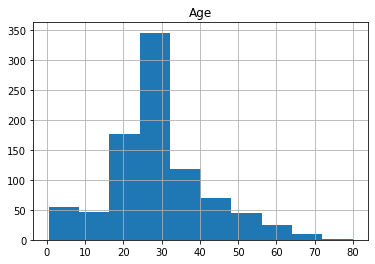

In [152]:
train1.hist('Age')

In [153]:
train1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [154]:
train1['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [155]:
train1['Sex'] = pd.get_dummies(train1.Sex)['female']
train1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [156]:
x = train1.drop(['Survived'], axis = 1)
y = train1['Survived']

In [157]:
test = pd.read_csv(DATA_PATH + 'test.csv')
# test = pd.read_csv('/kaggle/input/titanic/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [158]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
# x_train.shape, x_test.shape, y_train.shape, y_test.shape

x_train = train.drop("Survived", axis=1)
y_train = train["Survived"]
x_test  = test.drop("PassengerId", axis=1).copy()
x_train.shape, y_train.shape, x_test.shape

((891, 11), (891,), (418, 10))

In [159]:
test1.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
test1.head()

KeyError: "['PassengerId' 'Name' 'Ticket' 'Cabin' 'Embarked'] not found in axis"

In [160]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    object 
 2   Age     418 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   Fare    418 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 19.7+ KB


In [161]:
# 데이터 전처리
# null(결측치) 처리
test1['Age'].fillna(test1['Age'].mean(), inplace = True)
test1['Fare'].fillna(0, inplace = True)

test1.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [162]:
train1.shape[0], test1.shape[0]

(891, 418)

In [163]:
# KNN 
knn = KNeighborsClassifier(n_neighbors=10, p=2, weights='uniform')
knn.fit(x_train, y_train)
knn_pred = dt_knn.predict(x_test)
print('k-최근접 이웃 정확도 : {0:.3f}'.format(accuracy_score(y_test, knn_pred)))

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

In [164]:
knn_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1])

In [165]:
knn_pred.shape

(179,)

In [166]:
# dtree
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
print('의사결정나무 정확도 : {0:.3f}'.format(accuracy_score(y_test, dt_pred)))

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

In [167]:
dt_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1])

In [168]:
dt_pred.shape

(179,)

In [169]:
test['PassengerId'].shape

(418,)

In [174]:
output = pd.DataFrame({
    'PassengerId': test['PassengerId'].reshape(179,:), 
    'Survived': dt_pred
    })
output.to_csv("submission.csv", index = False)

SyntaxError: invalid syntax (<ipython-input-174-2a38aed17ef7>, line 2)

In [171]:
import seaborn as sns

pred_data = pd.read_csv('submission.csv')

sns.countplot(x='Survived', data=pred_data)

FileNotFoundError: [Errno 2] No such file or directory: 'submission.csv'